# Part A

### Question 1

Number of people who planned to purchase and actually place an order = 400. Total number of people = 2000

Therefore, the joint probability of people who planned and actually placed an order = 400/2000 = 0.2

Number of people who planned to purchase and actually place an order = 400. Total number of people who planned to purchase = 500

Therefore, the joint probability of people who planned and puchased among the people who planned = 400/500 = 0.8


### Question 2

In [67]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
n=10
p=0.05
k=np.arange(0,11)
binomial = stats.binom.pmf(k,n,p).round(2)

In [68]:
x=0
prob0=binomial[0]
print('Probability that zero items are defective is', prob0)
x=1
prob1=binomial[1]
print('Probability that one item is defective is', prob1)
prob3=sum(binomial[:3])
print('Probability that two or fewer items are defective is', prob3)
prob4=sum(binomial[3:])
print('Probability that three or more items are defective is', prob4)

Probability that zero items are defective is 0.6
Probability that one item is defective is 0.32
Probability that two or fewer items are defective is 0.99
Probability that three or more items are defective is 0.01


### Question 3

In [69]:
rate = 3
n=np.arange(0,20)
poisson = stats.poisson.pmf(n,rate).round(2)
poisson

array([0.05, 0.15, 0.22, 0.22, 0.17, 0.1 , 0.05, 0.02, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [70]:
prob1=1 - (poisson[0])
print('Probability that some cars are sold in a week', prob1)
prob2=1-sum(poisson[2:5])
print('Probability that two or more but less than five cars are sold in a week', prob2)

Probability that some cars are sold in a week 0.95
Probability that two or more but less than five cars are sold in a week 0.39


[0.05 0.2  0.42 0.65 0.82 0.92 0.97 0.99 1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.  ]


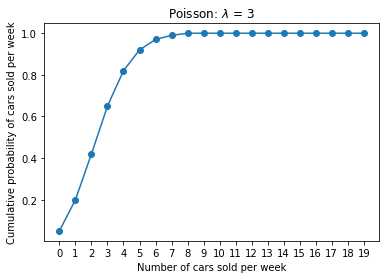

In [71]:
cum_poisson=stats.poisson.cdf(n,rate).round(2)
print(cum_poisson)

values=range(0,20,1)
plt.plot(n,cum_poisson,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative probability of cars sold per week')
plt.xticks(ticks=n, labels=values)
plt.show()

### Question 4

In [72]:
n=3
p=.868
k=np.arange(0,4)
binomial = stats.binom.pmf(k,n,p).round(2)

In [73]:
print('Probability that all the three orders will be recognised correctly is', binomial[3])
print('Probability that none of the three orders will be recognised correctly is', binomial[0])
print('Probability that at least two orders will be recognised correctly is', sum(binomial[2:]))

Probability that all the three orders will be recognised correctly is 0.65
Probability that none of the three orders will be recognised correctly is 0.0
Probability that at least two orders will be recognised correctly is 0.95


### Question 5

Healthcare industry can benefit with the use of all the three probability distribution concepts in different scenarios. 

Firstly, when the probability of occurence of a non-communicable disease in a population with similar demographics and health parameters is known and we wish to know the probability that the disease will occur in some or all the members of a group of n number of individuals selected from the same population we can use the concept of Binomial distribution.

Secondly, if a hospital wants to know whether there is a need for more doctors in their outpatient departments on a given day they can make use of the available data on the average number of patients attending the outpatient departments on that day to calculate the probabitlity of n number of patients attending the outpatient department on that day using the concept of Poisson distribution. Here, n must be more than the total number of patietns who can possibly be given an outpatient appointment with the doctors available on that day based on time constraints or other reasons. This not only helps in knowing whether there is a need to make more doctors available on the particular day but also in reducing the waiting times for patients to schedule an appointment with the doctor.

Thirdly, if there is a large group of n number of similar hospitals and the mean cost per year for running the hospitals is calculated, we can also derive the standard deviation of the mean cost per year of the hospitals. Using this information we can calulate the probability of the mean cost per year of a hospital to be beyond certain amount, which will help in making better financial decisions. However, it was assumed that n is greater than or equal to 30 and no catastrophic healthcare costs were incurred in any of the hospitals in order to apply the concept of Normal distribution.

# Part B

In [74]:
import pandas as pd
df=pd.read_csv('Basketball.csv')
df_original=pd.DataFrame(df)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [75]:
df_original.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [76]:
df_cleaned=pd.DataFrame(df_original[df_original.Team != 'Team 61']) #Team 61 has missing data in almost all the columns
df_cleaned.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,Team 56,1,35,38,8,11,19,36,55,-,-,2016_17,17
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


In [77]:
df_cleaned=df_cleaned.convert_dtypes()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     string
 1   Tournament           60 non-null     Int64 
 2   Score                60 non-null     string
 3   PlayedGames          60 non-null     string
 4   WonGames             60 non-null     string
 5   DrawnGames           60 non-null     string
 6   LostGames            60 non-null     string
 7   BasketScored         60 non-null     string
 8   BasketGiven          60 non-null     string
 9   TournamentChampion   60 non-null     string
 10  Runner-up            60 non-null     string
 11  TeamLaunch           60 non-null     string
 12  HighestPositionHeld  60 non-null     Int64 
dtypes: Int64(2), string(11)
memory usage: 6.7 KB


In [78]:
df_cleaned['Score']=df_cleaned['Score'].astype(str).astype(float)
df_cleaned['PlayedGames']=df_cleaned['PlayedGames'].astype(str).astype(float)
df_cleaned['WonGames']=df_cleaned['WonGames'].astype(str).astype(float)
df_cleaned['DrawnGames']=df_cleaned['DrawnGames'].astype(str).astype(float)
df_cleaned['LostGames']=df_cleaned['LostGames'].astype(str).astype(float)
df_cleaned['BasketScored']=df_cleaned['BasketScored'].astype(str).astype(float)
df_cleaned['BasketGiven']=df_cleaned['BasketGiven'].astype(str).astype(float)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 60 non-null     string 
 1   Tournament           60 non-null     Int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   60 non-null     string 
 10  Runner-up            60 non-null     string 
 11  TeamLaunch           60 non-null     string 
 12  HighestPositionHeld  60 non-null     Int64  
dtypes: Int64(2), float64(7), string(4)
memory usage: 6.7 KB


In [79]:
missing=pd.DataFrame({'value' : df_cleaned['TournamentChampion'], 'Missing?' : df_cleaned['TournamentChampion']=='-'})
x=sum(missing['Missing?']==True)
missing_percent=x/60*100
print('The percentage of missing values in TouranmentChampion column is',missing_percent)

missing2=pd.DataFrame({'value' : df_cleaned['Runner-up'], 'Missing?' : df_cleaned['Runner-up']=='-'})
x2=sum(missing2['Missing?']==True)
missing_percent2=x2/60*100
print('The percentage of missing values in Runner-up column is',missing_percent2)

The percentage of missing values in TouranmentChampion column is 85.0
The percentage of missing values in Runner-up column is 78.33333333333333


In [80]:
df_cleaned.drop(labels=['TournamentChampion','Runner-up'],inplace=True,axis=1) # These columns have greater than 50% missing data. Therefore they were removed without imputing. 

In [81]:
for i in range(0,60,1):
    if len(df_cleaned['TeamLaunch'][i])==4:
        df_cleaned['TeamLaunch'][i]=df_cleaned['TeamLaunch'][i]
    else:
        df_cleaned['TeamLaunch'][i]=df_cleaned['TeamLaunch'][i].replace(df_cleaned['TeamLaunch'][i],df_cleaned['TeamLaunch'][i][0:4])
    i+=1

df_cleaned['TeamLaunch']=df_cleaned['TeamLaunch'].astype(str).astype(int)
print(df_cleaned['TeamLaunch'])

0     1929
1     1929
2     1929
3     1931
4     1929
5     1934
6     1929
7     1929
8     1939
9     1932
10    1941
11    1939
12    1948
13    1929
14    1944
15    1935
16    1949
17    1933
18    1960
19    1951
20    1998
21    1941
22    1977
23    1959
24    2004
25    1935
26    1961
27    1940
28    1930
29    1963
30    1974
31    1943
32    1977
33    1987
34    1941
35    1991
36    2007
37    1962
38    1994
39    1978
40    1971
41    1963
42    1999
43    2014
44    1929
45    1990
46    1947
47    1996
48    1995
49    1945
50    1953
51    1929
52    1979
53    1929
54    1950
55    2016
56    2009
57    1956
58    1951
59    1955
Name: TeamLaunch, dtype: int32


In [82]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 60 non-null     string 
 1   Tournament           60 non-null     Int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TeamLaunch           60 non-null     int32  
 10  HighestPositionHeld  60 non-null     Int64  
dtypes: Int64(2), float64(7), int32(1), string(1)
memory usage: 7.6 KB


In [83]:
df_cleaned.to_csv('Basketball_cleaned.csv',index=False)

The outlier detection was not done because this data belongs to the sports domain. Therefore, it is quite difficult to consider that a particular number is a true outlier in this dataset.

In [84]:
import seaborn as sns
data=pd.read_csv('Basketball_cleaned.csv')
data.describe().round(2)

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,24.38,916.45,810.10,309.03,192.08,308.82,1159.35,1159.23,1957.95,7.05
std,26.88,1138.34,877.47,408.48,201.99,294.51,1512.06,1163.95,26.65,5.32
min,1.00,14.00,30.00,5.00,4.00,15.00,34.00,55.00,1929.00,1.00
25%,4.00,104.25,115.50,34.75,26.25,62.75,154.50,236.00,1934.75,3.00
50%,12.00,395.50,424.50,124.00,98.50,197.50,444.00,632.50,1950.50,6.00
75%,39.00,1360.50,1345.50,432.75,331.50,563.50,1669.75,2001.25,1977.25,10.00
max,86.00,4385.00,2762.00,1647.00,633.00,1070.00,5947.00,3889.00,2016.00,20.00


In [85]:
data['Win_percent']=data['WonGames']/data['PlayedGames']*100
data['Draw_percent']=data['DrawnGames']/data['PlayedGames']*100
data['Loss_percent']=data['LostGames']/data['PlayedGames']*100

data['Ratio_scored_given']=data['BasketScored']/data['BasketGiven']

groups=list(range(0,60,1))
for i in range(0,60,1):
    if i<=14:
        groups[i]='A'
    elif i>14 and i<=29:
        groups[i]='B'
    elif i>29 and i<=44:
        groups[i]='C'
    else:
        groups[i]='D'
i+=1

data['Team_groups']=groups

After analyzing the data a new column was created to group the teams based on thier performance as A, B, C, and D in the decreasing order of their performance with A group having the best performing teams and D group having the least performing teams.

In [86]:
data.head(5)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,Win_percent,Draw_percent,Loss_percent,Ratio_scored_given,Team_groups
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,1929,1,59.630702,19.985518,20.383780,1.893949,A
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,1929,1,57.241130,20.745836,22.013034,1.894669,A
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,1929,1,47.475134,22.876817,29.648049,1.370202,A
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,1931,1,44.557057,23.123123,32.319820,1.267801,A
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,1929,1,43.772629,22.918175,33.309196,1.251622,A


In [87]:
check=pd.DataFrame(data['WonGames']+data['DrawnGames']+data['LostGames']==data['PlayedGames']).value_counts()
check

True     59
False     1
dtype: int64

There is an error in either the number of total games played column or in one of the columns about the result of the games played.

In [88]:
data.describe().round(2)

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,Win_percent,Draw_percent,Loss_percent,Ratio_scored_given
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,24.38,916.45,810.10,309.03,192.08,308.82,1159.35,1159.23,1957.95,7.05,31.36,23.62,44.99,0.80
std,26.88,1138.34,877.47,408.48,201.99,294.51,1512.06,1163.95,26.65,5.32,7.83,4.46,8.40,0.27
min,1.00,14.00,30.00,5.00,4.00,15.00,34.00,55.00,1929.00,1.00,16.67,11.11,20.38,0.38
25%,4.00,104.25,115.50,34.75,26.25,62.75,154.50,236.00,1934.75,3.00,27.61,22.33,41.14,0.66
50%,12.00,395.50,424.50,124.00,98.50,197.50,444.00,632.50,1950.50,6.00,30.49,24.37,45.73,0.74
75%,39.00,1360.50,1345.50,432.75,331.50,563.50,1669.75,2001.25,1977.25,10.00,33.54,26.22,48.54,0.83
max,86.00,4385.00,2762.00,1647.00,633.00,1070.00,5947.00,3889.00,2016.00,20.00,59.63,38.60,70.00,1.89


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 60 non-null     object 
 1   Tournament           60 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TeamLaunch           60 non-null     int64  
 10  HighestPositionHeld  60 non-null     int64  
 11  Win_percent          60 non-null     float64
 12  Draw_percent         60 non-null     float64
 13  Loss_percent         60 non-null     float64
 14  Ratio_scored_given   60 non-null     float64
 15  Team_groups          60 non-null     objec

<AxesSubplot:xlabel='Team_groups', ylabel='Loss_percent'>

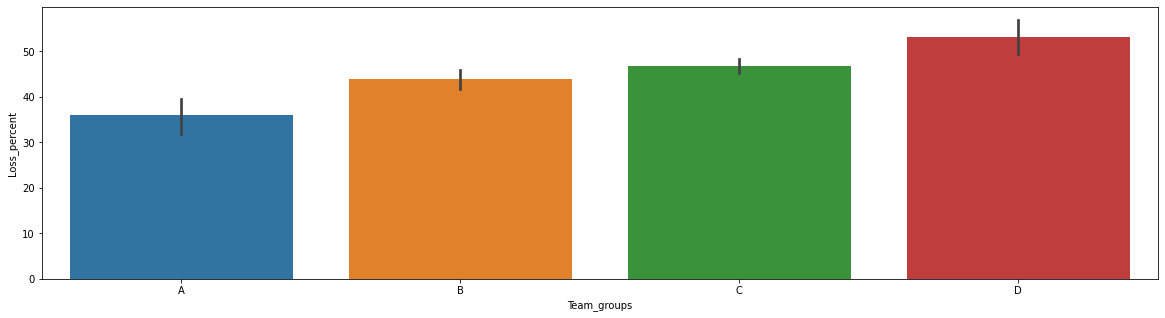

In [90]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='Loss_percent',ax=ax)

In [91]:
data['TeamLaunch'].value_counts().sort_values(ascending=False)

1929    10
1941     3
1963     2
1977     2
1935     2
1951     2
1939     2
1960     1
1987     1
1934     1
1932     1
1948     1
1944     1
1949     1
1933     1
2004     1
1998     1
1959     1
1943     1
1961     1
1940     1
1930     1
1974     1
1931     1
1991     1
1979     1
1962     1
2009     1
2016     1
1947     1
1994     1
1978     1
1971     1
1956     1
1999     1
2014     1
1990     1
1996     1
1950     1
1995     1
2007     1
1945     1
1953     1
1955     1
Name: TeamLaunch, dtype: int64

The most number of teams were launched in the year 1929.

In [92]:
year=data.groupby('Team_groups')
year.get_group('A')['TeamLaunch'].sort_values()

0     1929
1     1929
2     1929
4     1929
6     1929
7     1929
13    1929
3     1931
9     1932
5     1934
8     1939
11    1939
10    1941
14    1944
12    1948
Name: TeamLaunch, dtype: int64

The best performing teams were launched before 1949.

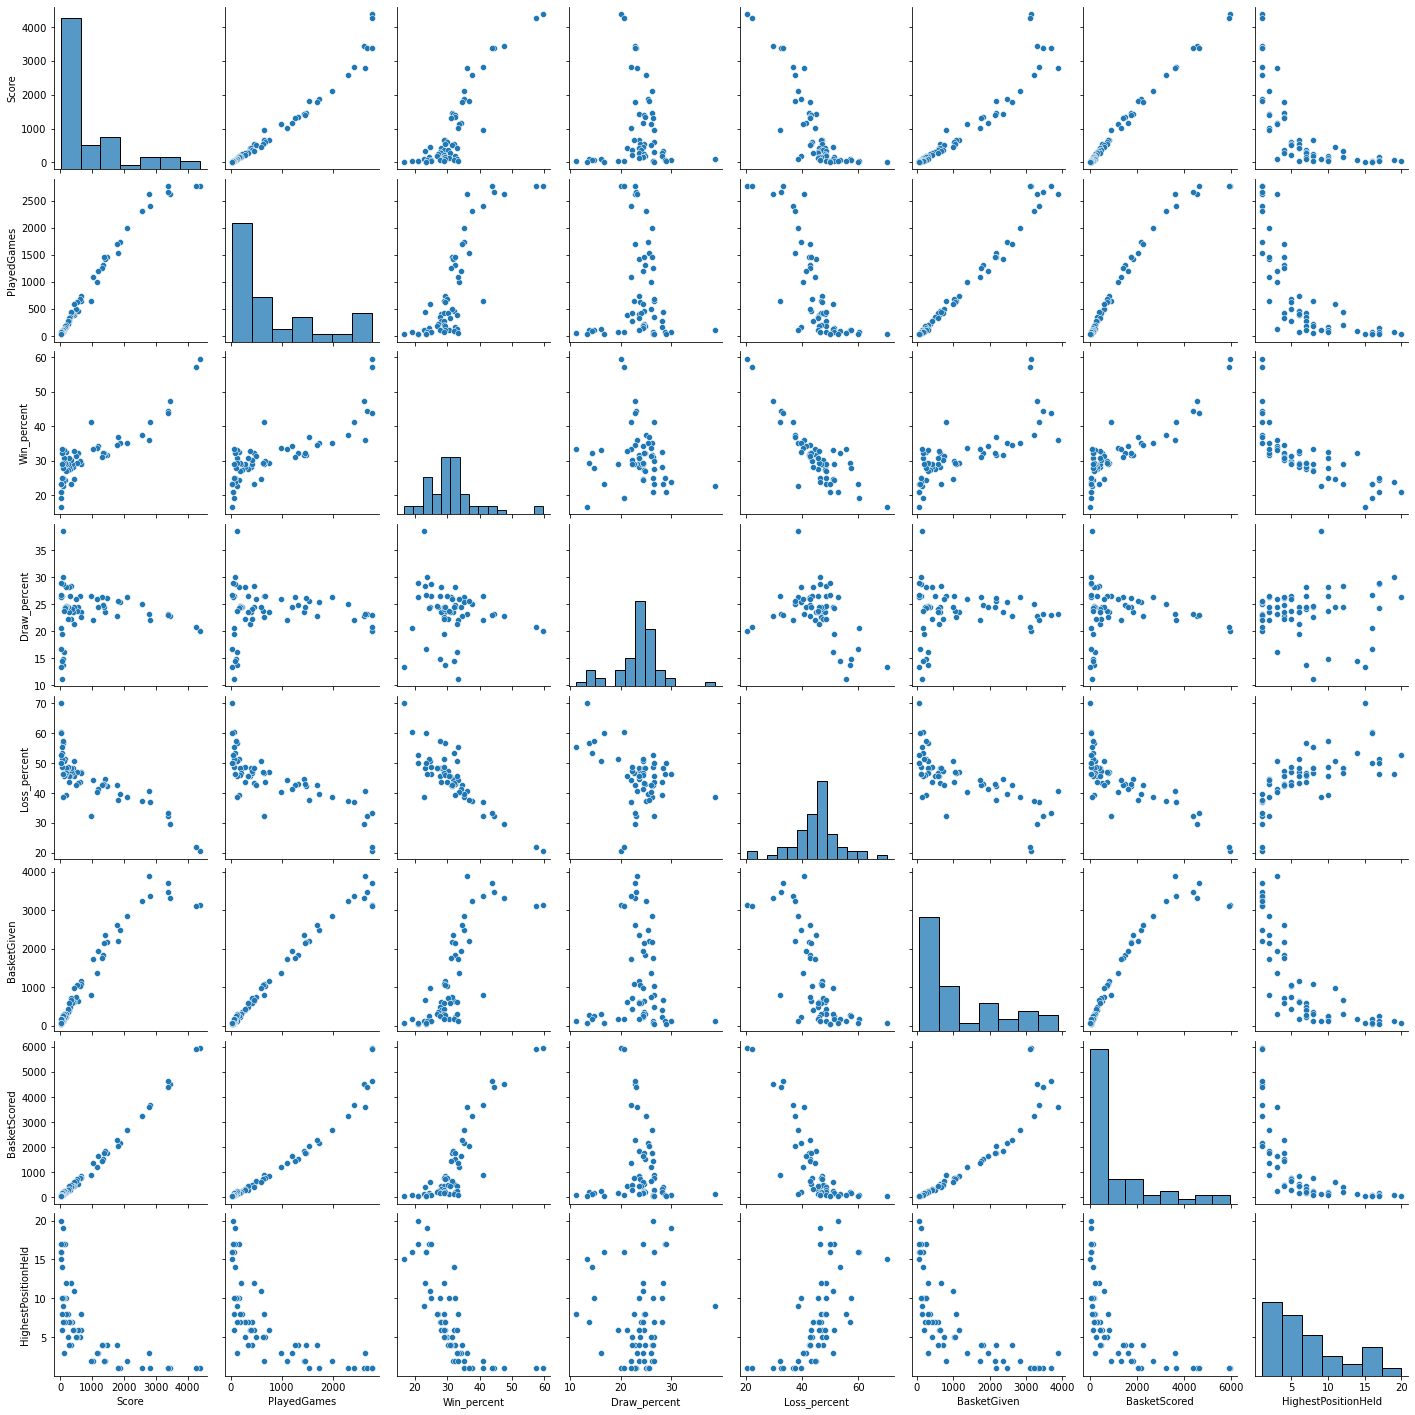

In [93]:
sns.pairplot(data=data,vars=['Score','PlayedGames','Win_percent','Draw_percent','Loss_percent','BasketGiven','BasketScored','HighestPositionHeld'])

The score and number of games played are directly proportional to each other. The highest position held is inversely proportional to number of games played.

<AxesSubplot:xlabel='Team_groups', ylabel='Win_percent'>

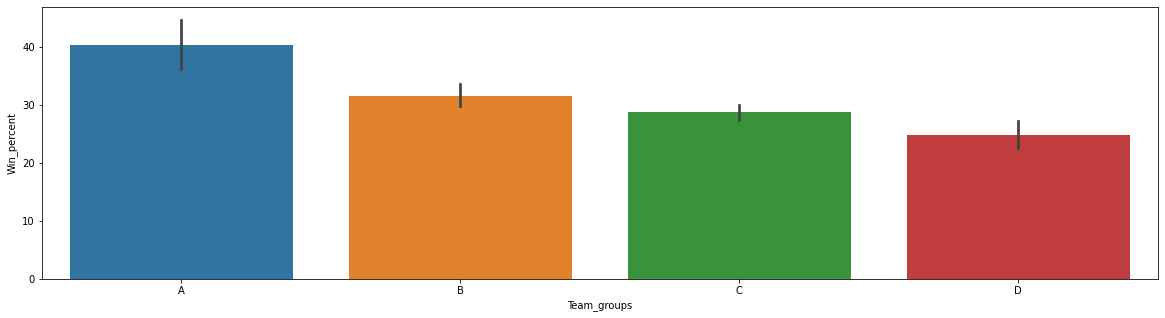

In [94]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='Win_percent',ax=ax)

<AxesSubplot:xlabel='Team_groups', ylabel='Draw_percent'>

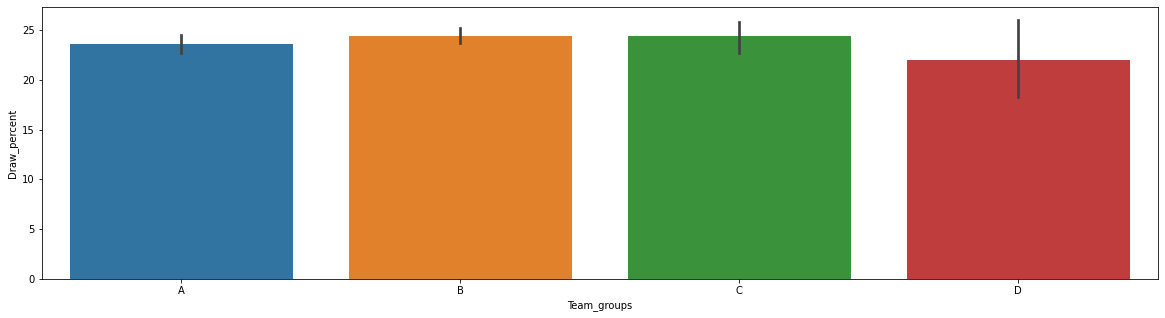

In [95]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='Draw_percent',ax=ax)

The percentage of games drawn was almost the same across the groups.

<AxesSubplot:xlabel='Team_groups', ylabel='Score'>

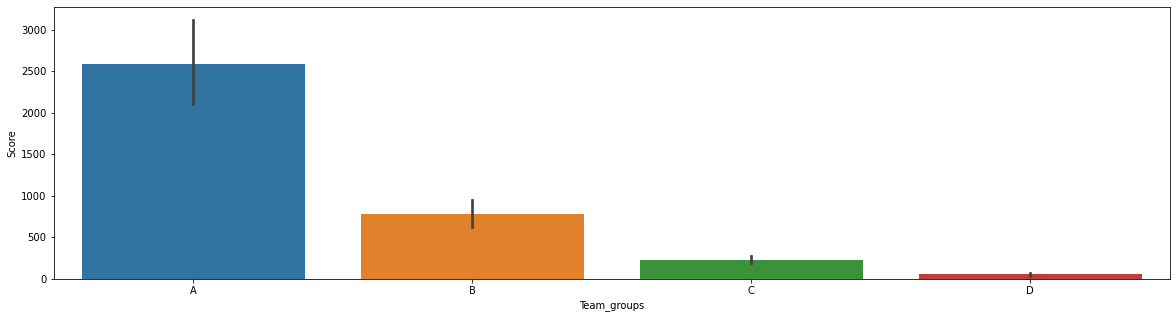

In [96]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='Score',ax=ax)

This shows that A group is a much better performer when compared to the other three groups.

<AxesSubplot:xlabel='Team_groups', ylabel='BasketGiven'>

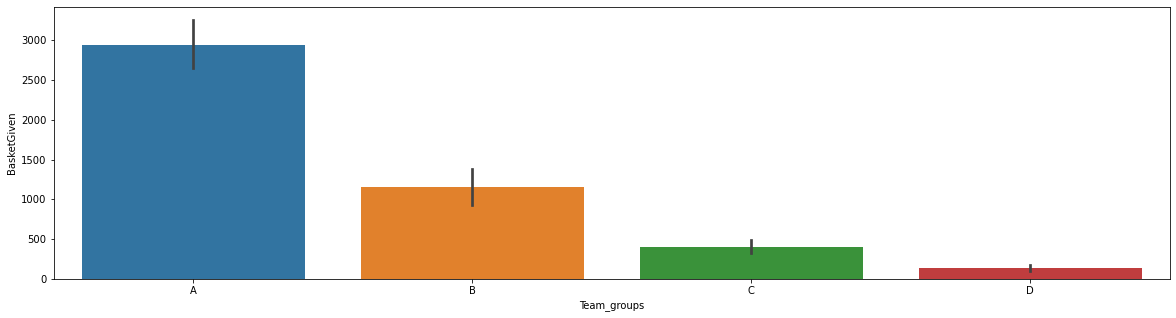

In [97]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='BasketGiven',ax=ax)

<AxesSubplot:xlabel='Team_groups', ylabel='BasketScored'>

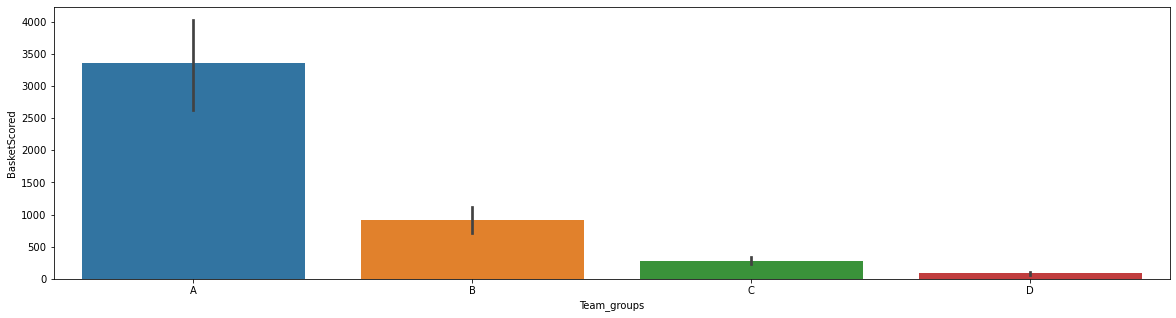

In [98]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='BasketScored',ax=ax)

<AxesSubplot:xlabel='Team_groups', ylabel='HighestPositionHeld'>

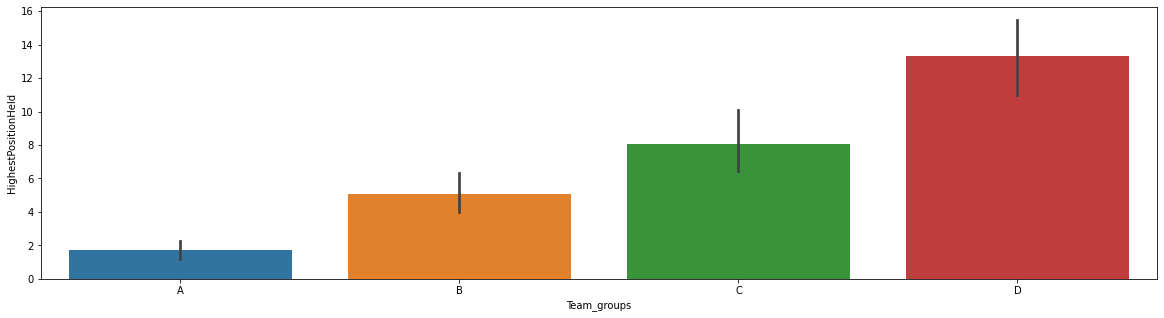

In [99]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='Team_groups',y='HighestPositionHeld',ax=ax)

This again shows that A group is the best performer and D group is the poorest performer.

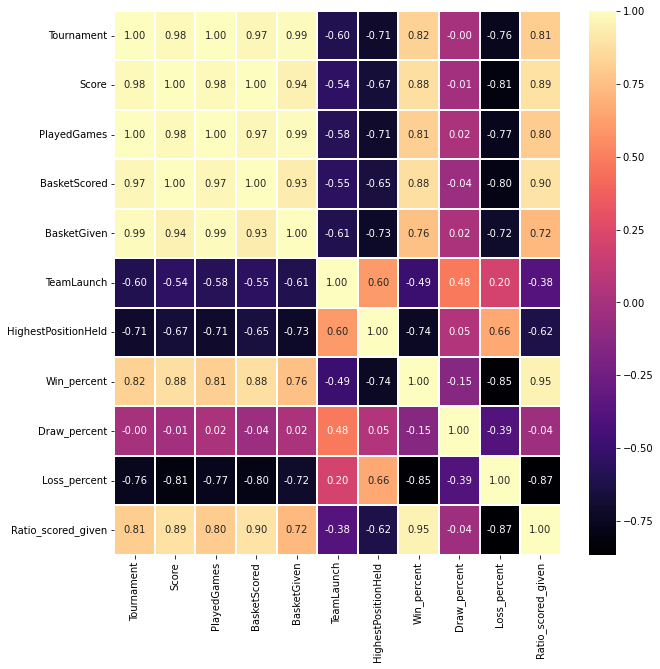

In [100]:
fig,ax = plt.subplots(figsize=(10, 10))   
data1=data.drop(['WonGames','DrawnGames','LostGames'],axis=1)
sns.heatmap(data1.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

4


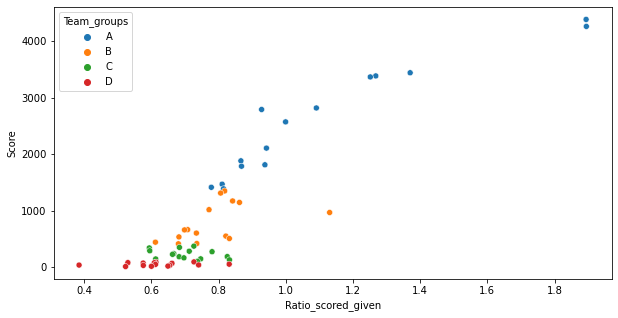

In [101]:
print(data['Team_groups'].nunique())
fig,axis=plt.subplots(figsize=(10,5))
sns.scatterplot(y=data['Score'],x=data['Ratio_scored_given'],hue=data['Team_groups'],ax=axis)
plt.show()

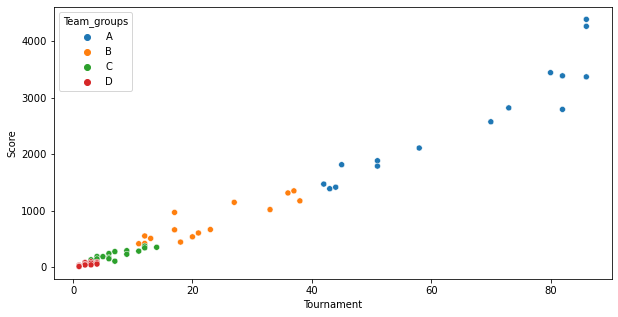

In [102]:
fig,axis=plt.subplots(figsize=(10,5))
sns.scatterplot(y=data['Score'],x=data['Tournament'],hue=data['Team_groups'],ax=axis)
plt.show()

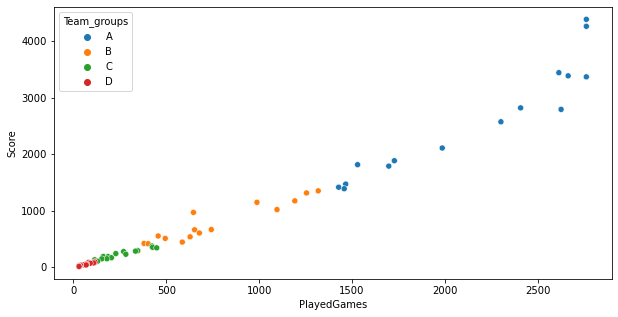

In [103]:
fig,axis=plt.subplots(figsize=(10,5))
sns.scatterplot(y=data['Score'],x=data['PlayedGames'],hue=data['Team_groups'],ax=axis)
plt.show()

In [104]:
print(data.groupby(['Team_groups']).get_group('A')['Tournament'].mean())
print(data.groupby(['Team_groups']).get_group('B')['Tournament'].mean())
print(data.groupby(['Team_groups']).get_group('C')['Tournament'].mean())
print(data.groupby(['Team_groups']).get_group('D')['Tournament'].mean())

65.26666666666667
22.333333333333332
7.666666666666667
2.2666666666666666


In [105]:
print(data.groupby(['Team_groups']).get_group('A')['PlayedGames'].mean())
print(data.groupby(['Team_groups']).get_group('B')['PlayedGames'].mean())
print(data.groupby(['Team_groups']).get_group('C')['PlayedGames'].mean())
print(data.groupby(['Team_groups']).get_group('D')['PlayedGames'].mean())

2146.266666666667
767.5333333333333
258.8666666666667
67.73333333333333


## Performance Report

The teams performing the best were those which were launched before the year 1949. These were the teams listed in the first ten rows of the dataset(Team 1 to Team 15). These teams were grouped as A group in the analysis. These had won 40% and lost around 35% of thier games. The best performing group (A) have played a significantly higher number of tournaments compared to the other groups.

The teams whose performance can be ranked as second best were grouped together as B group. Similarly, the teams whose performance can be ranked as third best and fourth best were grouped together as C and D respectively. On analyzing the data it can be concluded that the performance of the teams was better if the number of games they played was higher.

So, the company X can be suggested to approach the older teams in the group A in order to make winning deals.


## Suggestions to the association management

#### Quality:
The data quality can be improved by making sure the collection of data is accurate and complete. For example, there were two columns with more than 50% of missing values which means they cannot be used in the analysis and there was an error related to the number of games played for one team.

#### Quantity:
The quantity of data needs to be increased because it leads to better understanding of outliers.

#### Variety:
It will be better to perform more analysis if there is sufficient variety in the data. Therefore, the data must be collected for more attributes of the teams.

#### Velocity:
It is a good practice to collect the data at fixed intervals of time because it helps in observing the trends. These trends provide valuable information to perform predictive analytics and to make appropriate decisions. It is suggested that the teams date are regularly updated. 

#### Veracity:
The data can be more trustworthy if the data is collected wihtout any manipulations. The team names were not their original names in the dataset which may be due to some reason but it is not advisable to use manipulated data.

# Part C

In [106]:
df_company=pd.read_csv('Company.csv')

In [107]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [108]:
df_company.isnull().any()

Startup           False
Product            True
Funding            True
Event             False
Result            False
OperatingState    False
dtype: bool

In [109]:
new_df=df_company.dropna()
new_df.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [110]:
new_df.loc[:,'Funds_in_million']=new_df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1]=='K' else (float(x[1:-1])*1000 if x[-1]=='B' else float(x[1:-1])))

C:\Users\vjanu\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [111]:
new_df.head(5)

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


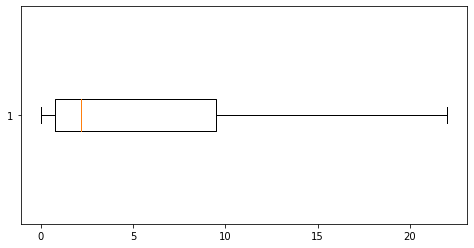

In [112]:
fig,ax=plt.subplots(figsize=[8,4])
plt.boxplot(new_df.Funds_in_million,showfliers=False,vert=False)
plt.show()

In [113]:
q1=new_df['Funds_in_million'].quantile(0.25)
q3=new_df['Funds_in_million'].quantile(0.75)
IQR=q3-q1
print(IQR)

8.72975


In [114]:
array_outliers=np.array(np.where((new_df['Funds_in_million'] < (q1 - 1.5 * IQR)) | (new_df['Funds_in_million'] > (q3 + 1.5 * IQR))))
array_upper=np.array(np.where (new_df['Funds_in_million']>(q3+1.5*IQR)))
print(array_upper.size)

60


The number of outliers above the upper fence for funds raised is 60.

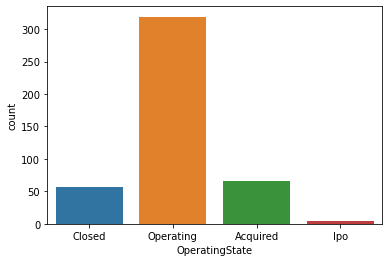

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64


In [115]:
sns.countplot(data=new_df,x='OperatingState')
plt.show()
frequency=new_df['OperatingState'].value_counts()
print(frequency)

In [116]:
new_df.groupby('OperatingState')['Funds_in_million'].mean().round(2)

OperatingState
Acquired      13.21
Closed         3.26
Ipo          137.77
Operating     19.06
Name: Funds_in_million, dtype: float64

There is a significant difference in the mean funding raised between the companies which are closed and operating.

Null hypothesis: There is no statistically significant difference between the means of funds raised by the companies which are closed and operating.

Alternative Hypothesis: There is a statistically significant difference between the means of funds raised by the companies which are closed and operating.

In [117]:
x=new_df.groupby('OperatingState')
group1=np.array(x.get_group('Closed')['Funds_in_million'])
group2=np.array(x.get_group('Operating')['Funds_in_million'])

In [118]:
print(group1)
print(group2)

[ 0.63    1.      0.9292  1.9     0.6     0.19   20.8     8.1     0.325
  5.5     0.35    0.75    0.475   6.7    12.      0.925   4.      0.16
  0.3     2.4    35.5     0.1     2.3     0.7     1.2     1.      0.1915
  0.3     0.15    0.5    10.      3.      0.875   7.3     3.      1.2
  1.      0.892   3.5     0.15    3.5     4.1     1.1     0.7     0.2
  1.5     0.6     1.8     0.3     0.65    4.2     0.28    0.093  14.5
  0.5     0.8    10.    ]
[1.000e+00 2.900e+01 1.800e+00 1.000e+00 7.500e-01 1.790e-02 1.160e+01
 1.220e+01 4.000e+00 2.400e+01 7.460e-01 7.100e+00 4.500e+00 5.090e+01
 8.300e+00 4.000e+00 1.230e+01 2.900e+00 3.200e-01 1.700e+00 2.000e-02
 2.050e+02 2.800e+00 1.250e-01 3.500e-01 6.750e-01 6.500e+00 2.000e+00
 1.180e-01 4.000e+00 2.050e+01 7.200e+00 2.300e+00 2.120e-01 7.000e+00
 8.500e+00 2.000e-02 5.000e+00 6.000e-02 8.800e+00 1.200e-01 2.000e+00
 2.300e+00 4.500e+00 2.200e+00 4.960e-01 1.400e+00 1.821e+02 8.480e-01
 2.000e+00 1.300e+00 2.000e+00 2.600e+00 4.115e-01 

In [119]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(group1,group2)
print(t_statistic, p_value)

-1.1382924515740138 0.25572701885629406


Since, the p value is higher than 5% we cannot reject the null hypothesis. Therefore, it implies that there is no statistically significant difference between the means of funds raised by the closed and operating companies. We can be 95% confident that our conclusion is correct.

In [120]:
df_copy=new_df.copy()

In [121]:
result_counts=pd.DataFrame(df_copy['Result'].value_counts())
result_counts.head(5)

,Result
Contestant,312
Finalist,65
Audience choice,25
Winner,25
Runner up,19


In [122]:
y=df_copy.groupby('OperatingState')
operating=pd.DataFrame(y.get_group('Operating')['Result'].value_counts())
operating.head(5)

,Result
Contestant,214
Finalist,46
Audience choice,23
Winner,18
Runner up,18


In [123]:
oper_con=214
n_con=312
oper_win=18
n_win=25
percent_con=round(214/312*100,2)
percent_win=round(18/25*100,2)
print(percent_con,percent_win)

68.59 72.0


Null Hypothesis: The proportion of operating companies which are contestants is equal to the proportion of operating companies which are winners.

Alternative Hypothesis: The proportion of operating companies which are contestants is not equal to the proportion of operating companies which are winners.

In [124]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([oper_con,oper_win] , [n_con,n_win])
print(stat, pval)

-0.3542506401722957 0.7231510556194248


Since the p value is higher than 5% we cannot reject the null hypothesis. Therefore, it can be concluded that the proportion of operating companies which are contenstants is equal to the proportion of operating companies which are winners because there is no statistically significant difference. We can be 95% confident of our conclusion.